<center> <h1>[INFO-F409] Learning Dynamics</h1> </center>

<center> <h2>Assignment 1: Game theory</h2> </center>
 
<center> <h3>Guillaume Buisson-Chavot</h3> </center> 
<center> <h3>ULB 000465822 </h3> </center> 

# The Hawk-Dove game (3 pts):
3. Validate your results using NashPy. You may use the example provided in
the CGT-Exercise.ipynb. Indicate here the Nash equilibria found for V=2,
D=3 and T = 1.

In [9]:
import nashpy as nash
import numpy as np
from ipywidgets import interact, FloatSlider

def hawk_dove_game_equilibria(V, D, T):
    """
    This function returns the Nash equilibria of
    a Hawk-Dove game with its payoff matrix being a
    function of V, D and T.
    """
    # payoff matrix for the row player
    hg_matrix_row = np.array([
        [ (V-D)/2, V],
        [ 0      , (V/2) - T],
    ])
    # payoff matrix for the column player
    hg_matrix_col = hg_matrix_row.T
    
    # Create game
    game = nash.Game(hg_matrix_row, hg_matrix_col)
    
    # Find all equilibria
    return list(game.support_enumeration())



@interact(V=FloatSlider(min=-10, max=10, step=0.1, value=2), 
          D=FloatSlider(min=-10, max=10, step=0.1, value=3), 
          T=FloatSlider(min=-10, max=10, step=0.1, value=1))
def show_articles_more_than(V=2, D=3, T=1):
    return hawk_dove_game_equilibria(V, D, T)

interactive(children=(FloatSlider(value=2.0, description='V', max=10.0, min=-10.0), FloatSlider(value=3.0, des…

# Evolutionary Dynamics in the Hawk-Dove game (4 pts)

For this exercise, you will need to use the code provided to you, and follow the
CGT-Exercise.ipynb. Here, you are going to study the evolutionary dynamics of
the Hawk-Dove game both in infinite and finite populations.


1. Plot the gradient of selection for infinite populations, explain which
saddle points are stable and which aren’t, and why. Do the results here
agree with those found in Exercise 1? Do you expect any changes if the
population is finite?

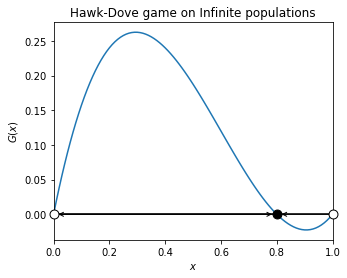

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from egttools.analytical import replicator_equation
from egttools.utils import find_saddle_type_and_gradient_direction
from egttools.plotting import plot_gradient


nb_points = 101
strategy_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)
strategy_j = 1 - strategy_i
states = np.array((strategy_i,strategy_j)).T

# Payoff matrix
V = 2; D = 3; T = 1
A = np.array([
        [ (V-D)/2, V],
        [ 0      , (V/2) - T],
    ])



# Calculate gradient
G = np.array([replicator_equation(states[i], A)[0] for i in range(len(states))])



# Find saddle points (where the gradient is 0)
epsilon = 1e-7
saddle_points_idx = np.where((G <= epsilon) & (G >= -epsilon))[0]
saddle_points = saddle_points_idx / (nb_points - 1)

# Now let's find which saddle points are absorbing/stable and which aren't
# we also annotate the gradient's direction among saddle poinst
saddle_type, gradient_direction = find_saddle_type_and_gradient_direction(G, saddle_points_idx)



ax = plot_gradient(strategy_i, 
                   G, 
                   saddle_points, 
                   saddle_type, 
                   gradient_direction,
                   'Hawk-Dove game on Infinite populations', 
                   xlabel='$x$')
plt.show()




In [4]:
print('saddle_points:', saddle_points)

saddle_points: [0.  0.8 1. ]
